In [1]:
import time
import ROOT
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from root_pandas import read_root
%run functions.ipynb
%run constants.ipynb

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.
Welcome to JupyROOT 6.14/06


In [2]:
def getData(inputFiles):
    cols = []
    scalar = []
    scalar.append('evid')
    scalar.append('nnh')
    scalar.append('ncharged')
    scalar.append('n_decay_photon')
    scalar.append('pt_jet')
    scalar.append('p_jet')
    scalar.append('eta_jet')
    scalar.append('pt_electron')
    scalar.append('Q2')
    scalar.append('W2')
    scalar.append('x')
    scalar.append('y')
    scalar.append('xsec')
    scalar.append('ntrials')
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print 'Processed', inputFilename, 'in',  end-start, 'seconds'
    return pd.concat([x for x in dataframes])

In [3]:
files=['$HOME/EIC/output/117.root']
a = getData(files)

Processed $HOME/EIC/output/117.root in 54.82452178 seconds


In [11]:
d = applyCut(a, '0.01 < y < 0.85', '0.01 < y < 0.85')
d = applyCut(d, 'W2 > 4', 'W2 > 4')
d = applyCut(d, 'p_jet > 4', 'p_jet > 4')
d = applyCut(d, 'Q2 > 1', 'Q2 > 1')
d.eval('mult = nneutral + ncharged', inplace=True)
d1 = applyCut(d, 'pt_jet > 4 and pt_jet < 5', '4 < pt_jet < 5')
d2 = applyCut(d, 'pt_jet > 9 and pt_jet < 10', '9 < pt_jet < 10')
d3 = applyCut(d, 'pt_jet > 20 and pt_jet < 21', '20 < pt_jet < 21')

0.01 < y < 0.85 28989288  fraction kept: 66.1
W2 > 4 28989288  fraction kept: 100.0
p_jet > 4 6775902  fraction kept: 23.4
Q2 > 1 6775902  fraction kept: 100.0
4 < pt_jet < 5 358687  fraction kept: 5.3
9 < pt_jet < 10 40287  fraction kept: 0.6
20 < pt_jet < 21 1322  fraction kept: 0.0


In [61]:
def plot(df_array, label_array, color_array):
    for i in range(0,len(df_array)):
        plt.hist(df_array[i]['mult'], label='$ '+ label_array[i] + ' GeV$', range=(0,20), bins=20, histtype='step', fill=False, stacked=True, normed=True, color=color_array[i])

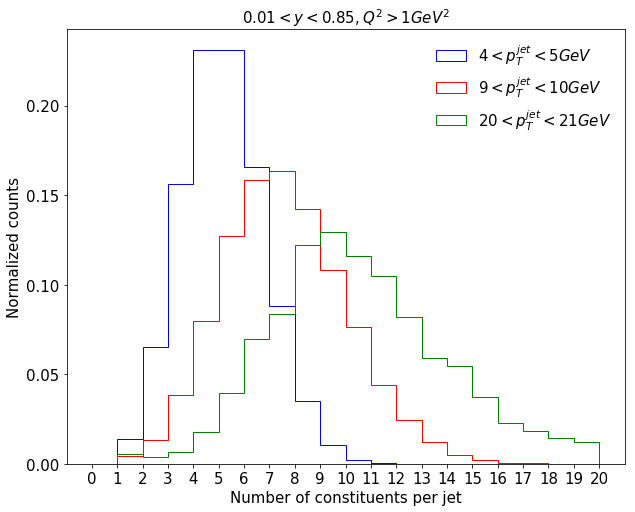

In [70]:
fig = plt.figure(figsize=(10,8))
plot([d1,d2,d3], ['4 < p_T^{jet} < 5','9 < p_T^{jet} < 10','20 < p_T^{jet} < 21'], ['b','r','g'])
plt.title('$ 0.01 < y < 0.85, Q^2 > 1 GeV^2$', fontsize=15)
plt.xlabel('Number of constituents per jet', fontsize=15)
plt.ylabel('Normalized counts', fontsize=15)
plt.xticks(np.arange(21), fontsize=15)
plt.yticks(fontsize=15)
plt.legend(prop={'size': 15}, frameon=False, loc='best')

In [4]:
colorArray = ['b','r','g','m','lawngreen','orange','indianred','skyblue']
labelArray = ['$\eta_{jet} < -3.0$','$-3.0 < \eta_{jet} < -2.0$','$-2.0 < \eta_{jet} < -1.0$','$-1.0 < \eta_{jet} < 0$',\
              '$0 < \eta_{jet} < 1.0$', '$1.0 < \eta_{jet} < 2.0$', '$2.0 < \eta_{jet} < 3.0$', '$\eta_{jet} > 3.0$']
etaedges = [-4.5, -3.0, -2.0, -1.0, 0, 1, 2, 3, 4.5]
ptedges = toArrayFloat(0, 1.55, 0, log=True, logNum=13)

In [10]:
b = applyCut(a, '0.1 < y < 0.85', '0.1 < y < 0.85')
b = applyCut(b, 'p_jet > 5', 'p_jet > 5')
b = applyCut(b, 'Q2 > 10', 'Q2 > 10')
b = applyCut(b, 'W2 > 4', 'W2 > 4')
b.eval('nnm = n_decay_photon / 2', inplace=True)
b.eval('tot = nnh + ncharged + nnm', inplace=True)

0.1 < y < 0.85 6783540  fraction kept: 18.7
p_jet > 5 1235189  fraction kept: 18.2
Q2 > 10 558256  fraction kept: 45.2
W2 > 4 558256  fraction kept: 100.0


In [11]:
d = partitionEtaPt(b, etaedges, ptedges)


-4.5 < eta_jet < -3.0 

-4.5 < eta_jet < -3.0 1803  fraction kept: 0.3
1.0 < pt_jet < 1.3463769461724673 162  fraction kept: 9.0
1.3463769461724673 < pt_jet < 1.812730881184699 14  fraction kept: 0.8
1.812730881184699 < pt_jet < 2.440619068041981 0  fraction kept: 0.0
2.440619068041981 < pt_jet < 3.285993247600655 0  fraction kept: 0.0
3.285993247600655 < pt_jet < 4.424185553847917 0  fraction kept: 0.0
4.424185553847917 < pt_jet < 5.956621435290106 0  fraction kept: 0.0
5.956621435290106 < pt_jet < 8.019857777551351 0  fraction kept: 0.0
8.019857777551351 < pt_jet < 10.7977516232771 0  fraction kept: 0.0
10.7977516232771 < pt_jet < 14.537843856076622 0  fraction kept: 0.0
14.537843856076622 < pt_jet < 19.573417814876606 0  fraction kept: 0.0
19.573417814876606 < pt_jet < 26.353198503751333 0  fraction kept: 0.0
26.353198503751333 < pt_jet < 35.48133892335755 0  fraction kept: 0.0

-3.0 < eta_jet < -2.0 

-3.0 < eta_jet < -2.0 28764  fraction kept: 5.2
1.0 < pt_jet < 1.346376946172467

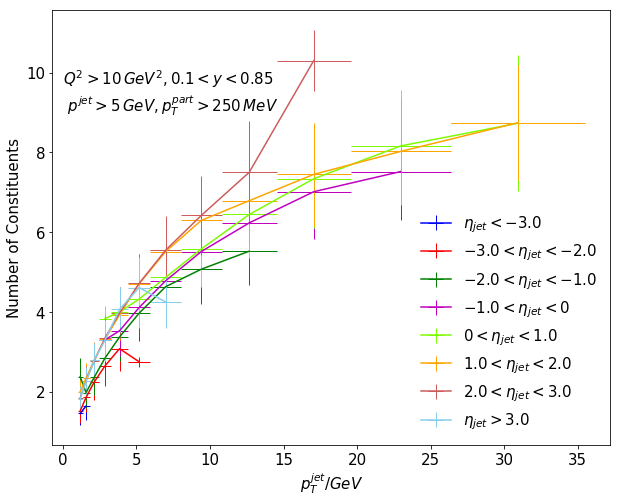

In [14]:
fig = plt.figure(figsize=(10,8))
for i in range(len(etaedges)-1):
    x = []*(len(ptedges)-1)
    y = []*(len(ptedges)-1)
    yerr = []*(len(ptedges)-1)
    for j in range(len(ptedges)-1):
        df = d[i][j]
        x.append((((float)(ptedges[j])) + ptedges[j+1])/2)
        y.append(np.mean(df['tot']))
        xerr = getInterval(ptedges)/2
        yerr.append(np.std(df['tot'])/2)
    plt.errorbar(x, y, xerr = xerr, yerr = yerr, color=colorArray[i], elinewidth=1, label=labelArray[i])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('$p_T^{jet} / GeV$', fontsize=15)
plt.ylabel('Number of Constituents', fontsize=15)
plt.legend(prop={'size': 15}, frameon=False, loc='best')
plt.text(0,9,'$ Q^2 > 10 \, GeV^2, 0.1 < y < 0.85 $ \n $p^{jet} > 5 \, GeV, p_T^{part} > 250 \, MeV $', fontsize=15)
plt.savefig('images/number.pdf', bbox_inches='tight')